In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn 

In [2]:
df = pd.read_csv('mall customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull() #chack null value by true and false 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [4]:
df.isnull().sum()# tis another way to chack null value . no null value wouldn'd define 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#df = df.rename(columns={'Annual Income (k$)':'income', "Spending Score (1-100)":'score'})
#rename the annual income and spending score name as a income and score . 
df.rename(columns={'Annual Income (k$)':'income', "Spending Score (1-100)":'score'}, inplace=True)

In [6]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df = df.drop('CustomerID', axis=1)# drop customerid value 

In [8]:
df.describe()#statistical 

,Age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# do vizulize 

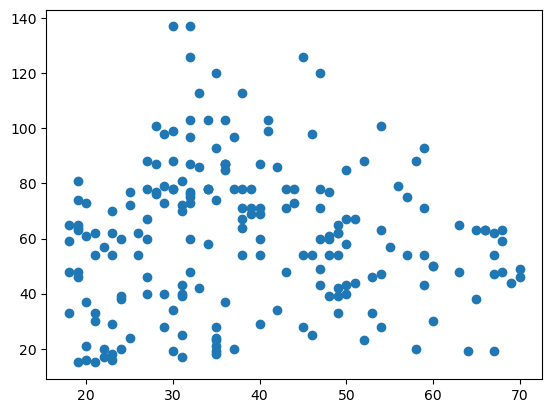

In [9]:
plt.scatter(df['Age'], df.income) # relation between age and income 

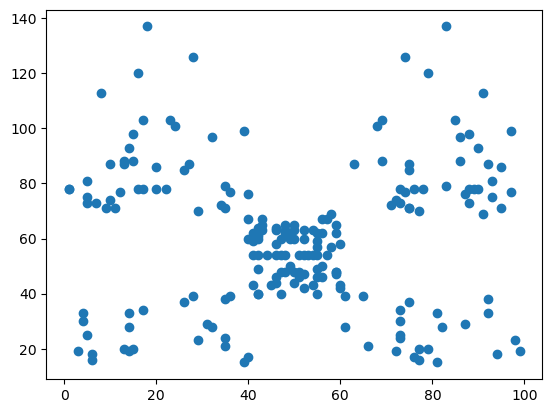

In [10]:
plt.scatter(df.score, df.income)# relation between score and income 

# pairplot

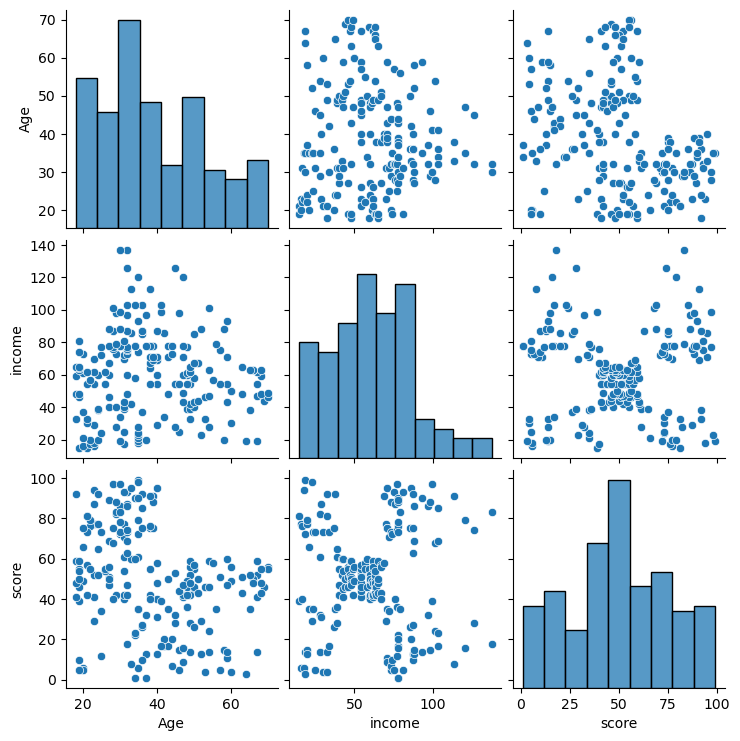

In [11]:
seaborn.pairplot(df[['Age', 'income', 'score']])# all value vezualized together by pairplot. 
#seaborn.pairplot(df[['Age', 'income', 'score']])

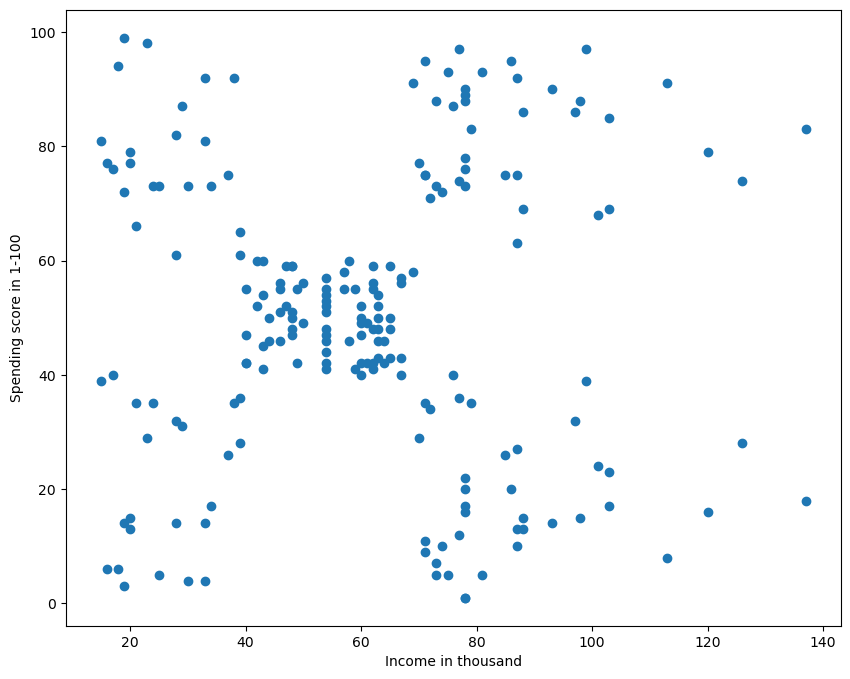

In [12]:
plt.figure(figsize=(10,8))
plt.xlabel('Income in thousand')
plt.ylabel('Spending score in 1-100')
plt.scatter(df.income, df.score) # to vuzialiation by piarplot betwee tow ( income and score)value

# k means cluster

In [13]:
from sklearn.cluster import KMeans
km1 = KMeans() # n_clusters=8

In [15]:
predicted = km1.fit_predict(df[['income', 'score']]) # we can : fit_predict(df[['income', 'score', 'Age','ho jo bo ro lo']]) multifle value

In [16]:
predicted

array([5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 1, 3, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 4, 6, 4, 2, 4, 2, 4,
       6, 4, 2, 4, 2, 4, 2, 4, 2, 4, 6, 4, 2, 4, 6, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 6, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0,
       7, 0])

In [17]:
df['initial_clusters'] = predicted# df data set held new one featre 

In [18]:
df.head()

,Gender,Age,income,score,initial_clusters
0,Male,19,15,39,5
1,Male,21,15,81,3
2,Female,20,16,6,5
3,Female,23,16,77,3
4,Female,31,17,40,5


In [19]:
center1 = km1.cluster_centers_ # chack all cluster centroid

In [20]:
center1

array([[108.18181818,  82.72727273],
       [ 47.72340426,  50.82978723],
       [ 80.18181818,  12.68181818],
       [ 25.0952381 ,  80.04761905],
       [ 78.03571429,  81.89285714],
       [ 25.14285714,  19.52380952],
       [ 64.45      ,  46.45      ],
       [109.7       ,  22.        ]])

In [21]:
km1.predict([[15, 45]]) # note it would't give us accurate result

C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([5])

In [ ]:
# do 2d vizulition for chacking accurate result 

In [22]:
df0 = df[df.initial_clusters == 0]# creat lot of data frame for accurate result
df1 = df[df.initial_clusters == 1]
df2 = df[df.initial_clusters == 2]
df3 = df[df.initial_clusters == 3]
df4 = df[df.initial_clusters == 4]
df5 = df[df.initial_clusters == 5]
df6 = df[df.initial_clusters == 6]
df7 = df[df.initial_clusters == 7]

In [23]:
df0.shape# chack df0 shape 

(11, 5)

In [24]:
df1.shape# chack df1 shape 

(47, 5)

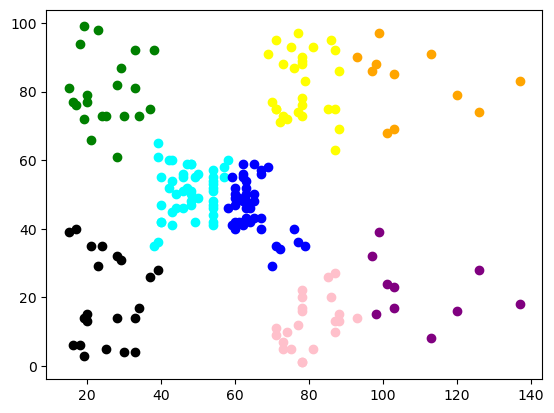

In [25]:
plt.scatter(df0['income'], df0['score'], color='orange',label='Cluster 0')# now sree out put by scatter plot and also set different color for different value 
plt.scatter(df1['income'], df1['score'], color='cyan',label='Cluster 1')
plt.scatter(df2['income'], df2['score'], color='pink',label='Cluster 2')
plt.scatter(df3['income'], df3['score'], color='green',label='Cluster 3')
plt.scatter(df4['income'], df4['score'], color='yellow',label='Cluster 4')
plt.scatter(df5['income'], df5['score'], color='black',label='Cluster 5')
plt.scatter(df6['income'], df6['score'], color='blue',label='Cluster 6')
plt.scatter(df7['income'], df7['score'], color='purple',label='Cluster 7')

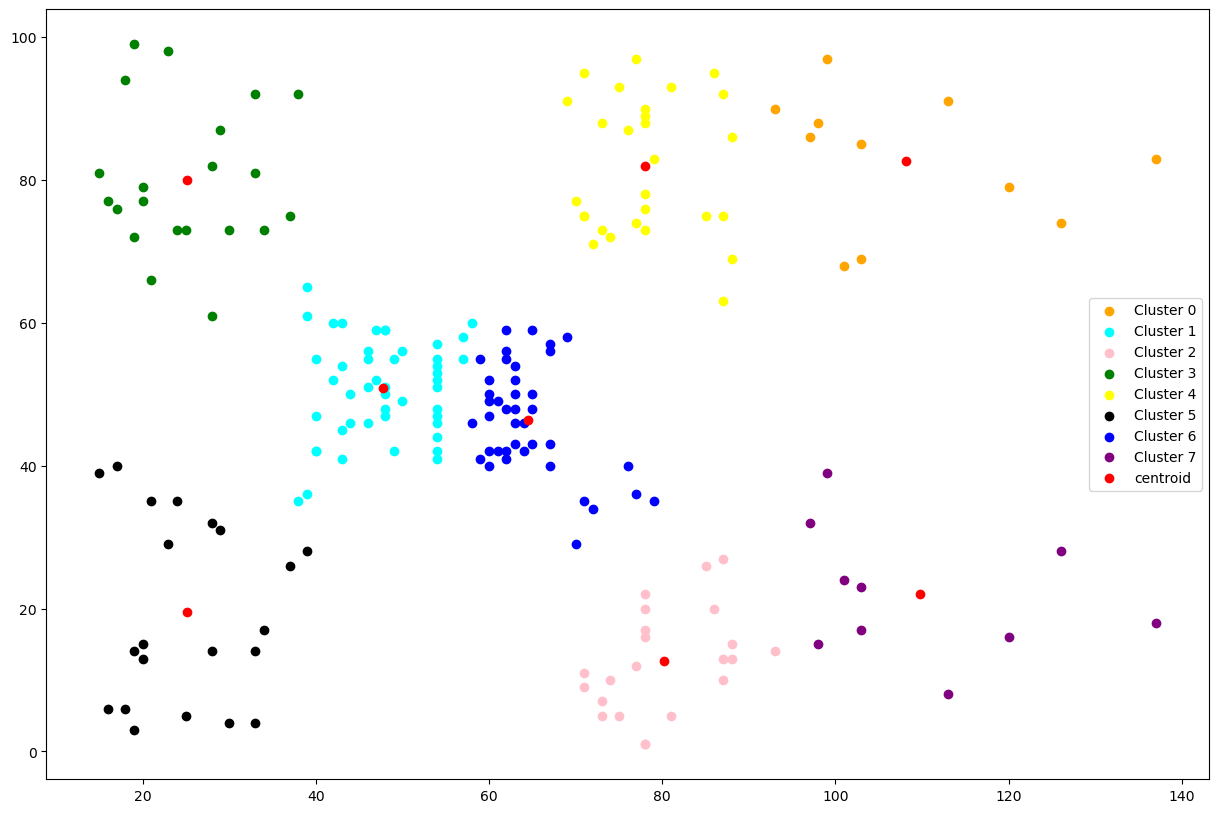

In [26]:
plt.figure(figsize=(15,10))

plt.scatter(df0['income'], df0['score'], color='orange',label='Cluster 0')
plt.scatter(df1['income'], df1['score'], color='cyan',label='Cluster 1')
plt.scatter(df2['income'], df2['score'], color='pink',label='Cluster 2')
plt.scatter(df3['income'], df3['score'], color='green',label='Cluster 3')
plt.scatter(df4['income'], df4['score'], color='yellow',label='Cluster 4')
plt.scatter(df5['income'], df5['score'], color='black',label='Cluster 5')
plt.scatter(df6['income'], df6['score'], color='blue',label='Cluster 6')
plt.scatter(df7['income'], df7['score'], color='purple',label='Cluster 7')

#centroids
plt.scatter(center1[:,0], center1[:,1], color='red', label='centroid')

plt.legend()# to show which color use which cluster

# optimization ( chack optima number)

In [27]:
#Elbow method
#WCSS - Within Clusters Sum of Squares

In [28]:
wcss = []
cluster = range(1,20)

for k in cluster:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['income', 'score']])
    wcss.append(km2.inertia_)

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
wcss # show decreas or optima 

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25044.967764018933,
 21826.936303231654,
 19672.07284901432,
 17593.5340346421,
 15836.460802318867,
 14321.88182112006,
 12746.969092182328,
 12291.112393687394,
 10929.50855197434,
 10225.676467306641,
 9514.807276901844,
 8617.387683150184]

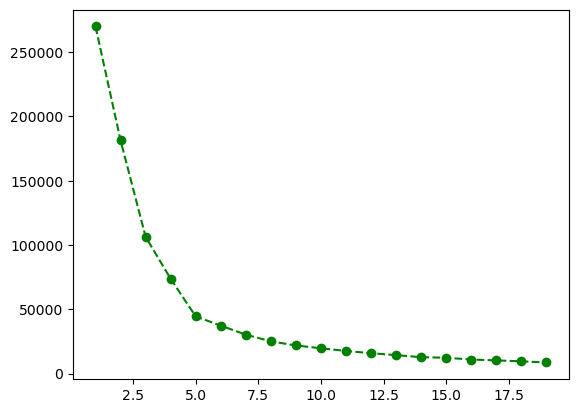

In [30]:
plt.plot(cluster, wcss,'go--') # show dereas how it is drease and how many number optima. where optime no 5.

In [41]:
#!pip install kneed

In [32]:
from kneed import KneeLocator # why optima no 5 to check this use kneed library

In [33]:
kn = KneeLocator(cluster, wcss, curve='convex',direction='decreasing')

In [34]:
kn.knee # here is the ans why optima no 5?

5

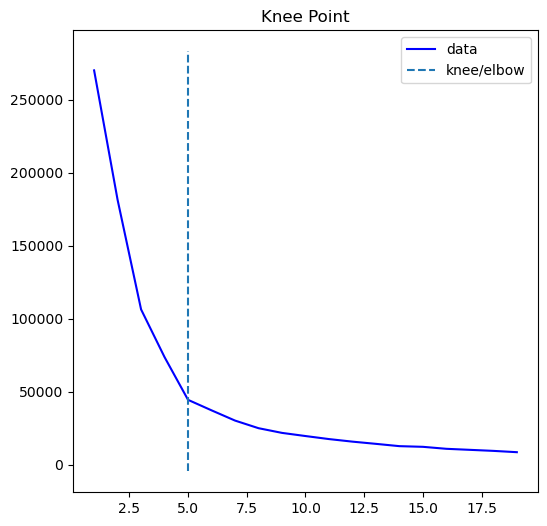

In [35]:
kn.plot_knee()#this is the gruph as a avedence 

# after

In [36]:
km3 = KMeans(n_clusters=5) # now we find out this data set's kmeans.
predincted = km3.fit_predict(df[['income', 'score']])

In [37]:
df['initial_clusters'] = predicted

In [38]:
center1 = km3.cluster_centers_

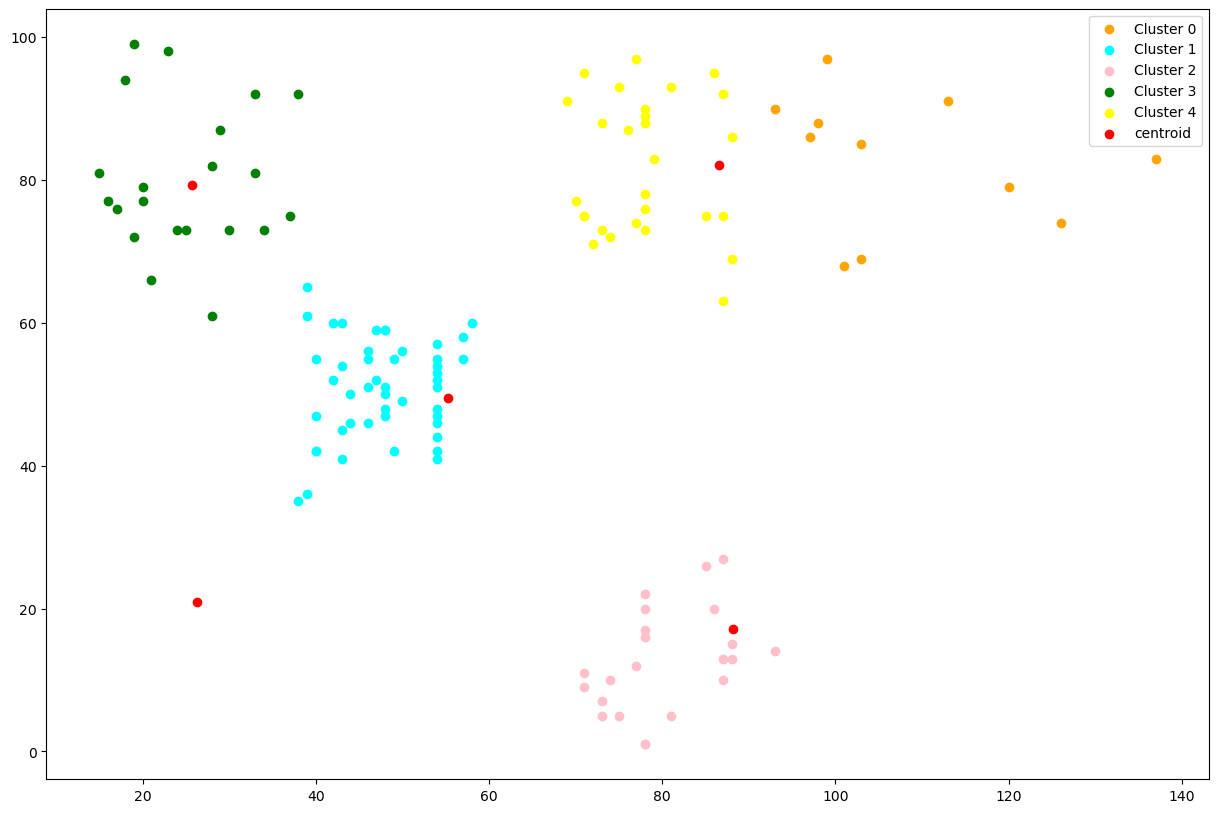

In [39]:
plt.figure(figsize=(15,10))

df0 = df[df.initial_clusters == 0]
df1 = df[df.initial_clusters == 1]
df2 = df[df.initial_clusters == 2]
df3 = df[df.initial_clusters == 3]
df4 = df[df.initial_clusters == 4]

plt.scatter(df0['income'], df0['score'], color='orange',label='Cluster 0')
plt.scatter(df1['income'], df1['score'], color='cyan',label='Cluster 1')
plt.scatter(df2['income'], df2['score'], color='pink',label='Cluster 2')
plt.scatter(df3['income'], df3['score'], color='green',label='Cluster 3')
plt.scatter(df4['income'], df4['score'], color='yellow',label='Cluster 4')

#centroids
plt.scatter(center1[:,0], center1[:,1], color='red', label='centroid')

plt.legend()

In [40]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html